# Attribute Information:

1. age (numeric)
2. job : type of job (categorical:admin.','bluecollar','entrepreneur','housemaid','management','retired','selfemployed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical:'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. balance: average yearly balance, in euros (numeric)
7. housing: has housing loan? (categorical: 'no','yes','unknown')
8. loan: has personal loan? (categorical: 'no','yes','unknown')
9. contact: contact communication type (categorical:'cellular','telephone')
10. day: last contact day of the month (numeric 1 -31)
11. month: last contact month of year (categorical: 'jan', 'feb','mar', …, 'nov', 'dec')
12. duration: last contact duration, in seconds (numeric).
13. Important note: this attribute highly affects the output target (e.g., ifduration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known.Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
14. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
15. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
16. previous: number of contacts performed before this campaign and for this client (numeric)
17. poutcome: outcome of the previous marketing campaign(categorical: 'failure','nonexistent','success')
18. target: has the client subscribed a term deposit? (binary:"yes","no")

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(12, 8)})


In [2]:
bank =pd.read_excel('bank-full.xlsx') 
df= bank.copy()
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [5]:
num_cols = df.select_dtypes(include=['int64'])
category_cols = df.select_dtypes(exclude=['int64'])

In [6]:
for col in category_cols.columns:
    print(f'{col} :  ')
    print('*' * 90) 
    print(df[col].value_counts())
    print('length:', len(df[col].value_counts()))
    print('\n')

job :  
******************************************************************************************
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
length: 12


marital :  
******************************************************************************************
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
length: 3


education :  
******************************************************************************************
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
length: 4


default :  
******************************************************************************************
no     44396
yes      815
Name: default, dtype: int64
length: 2


housing :  

In [7]:
(df.isna().sum()/df.shape[0])*100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

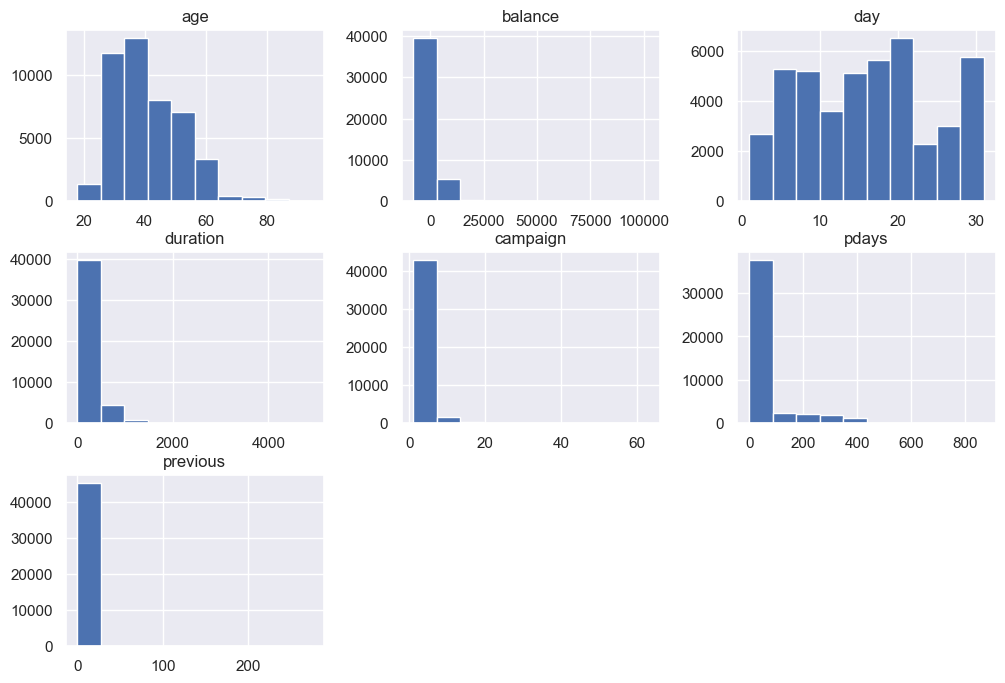

In [8]:
df.hist();

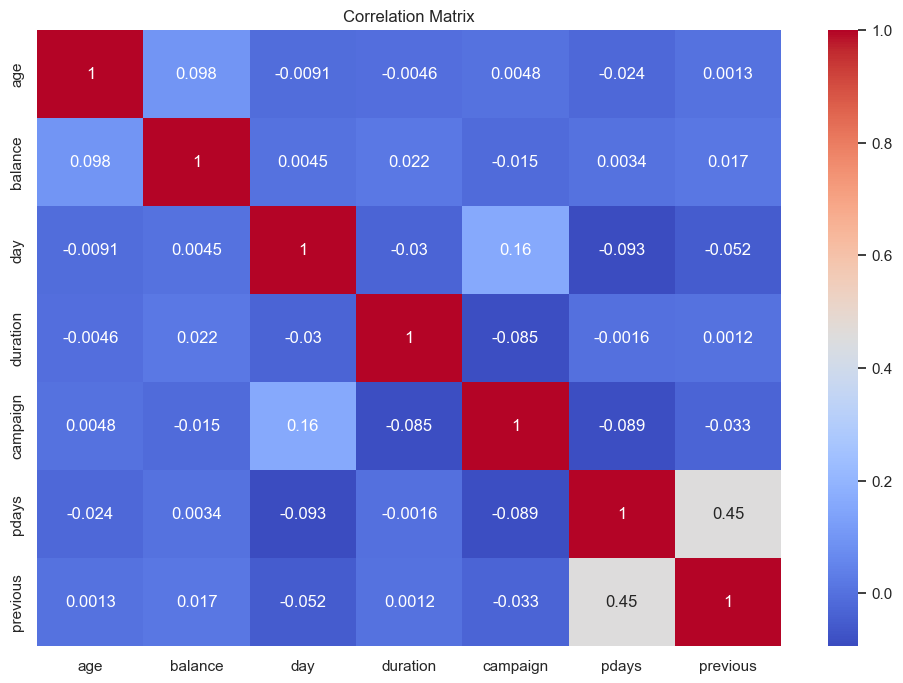

In [9]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

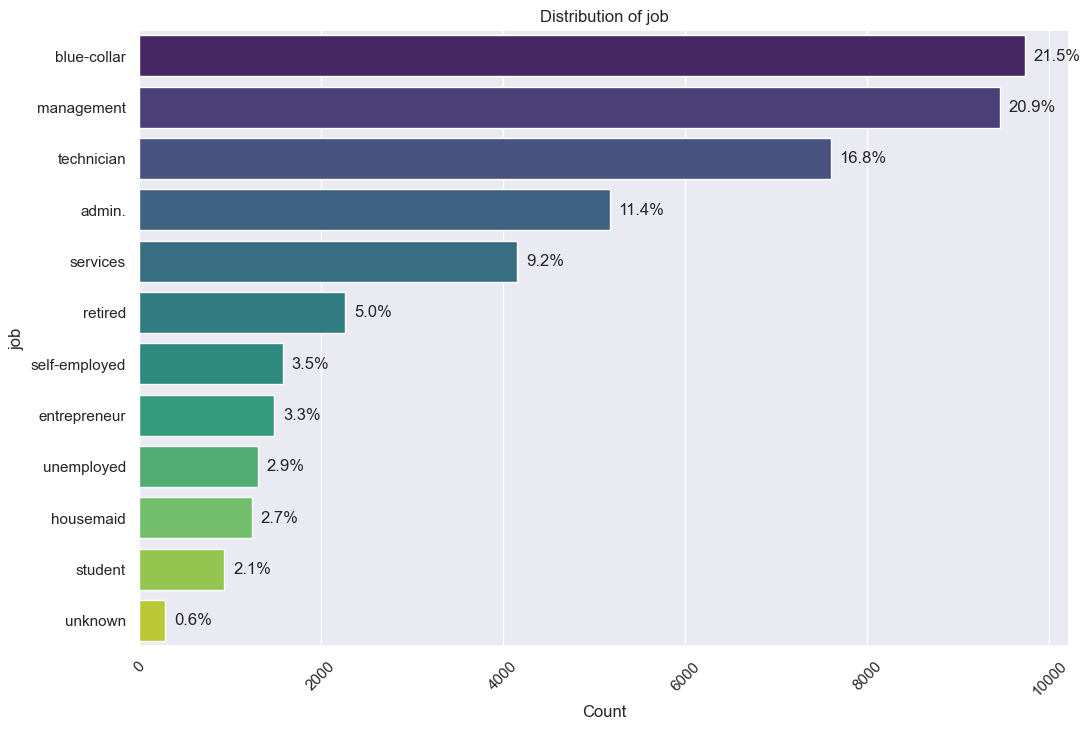

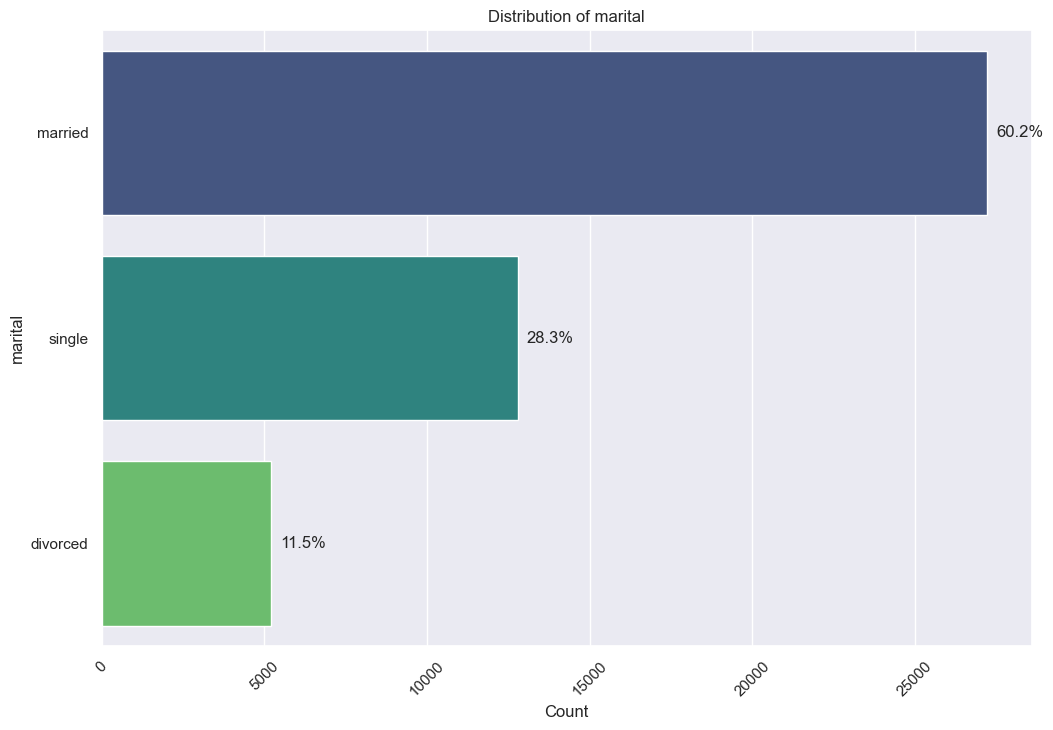

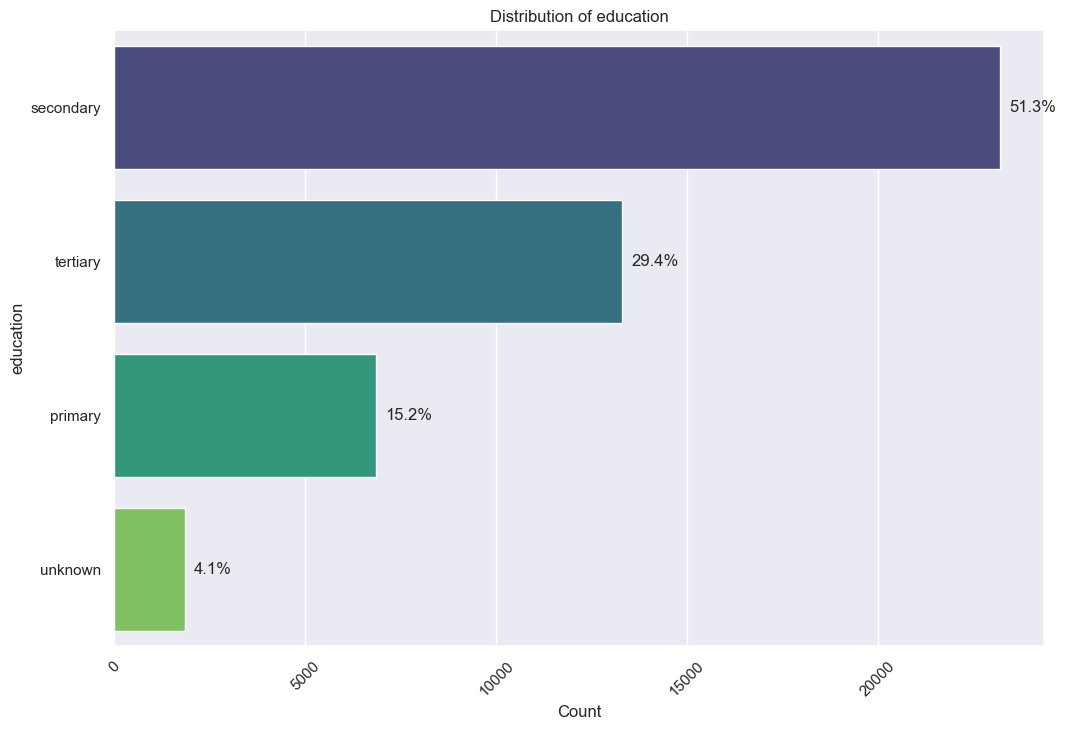

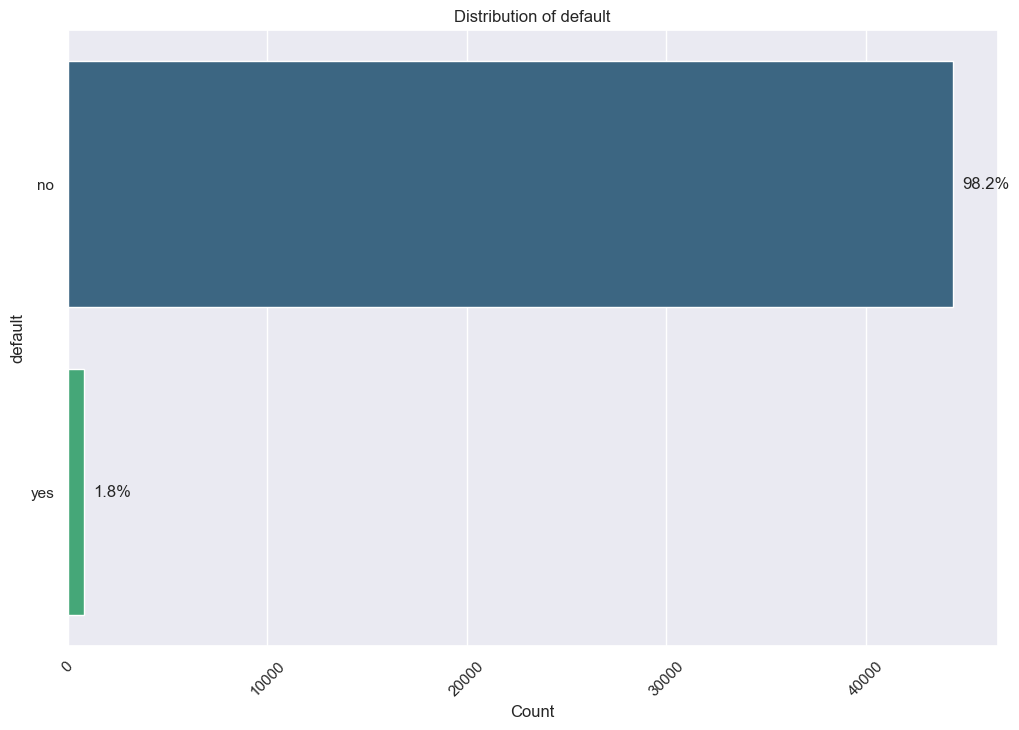

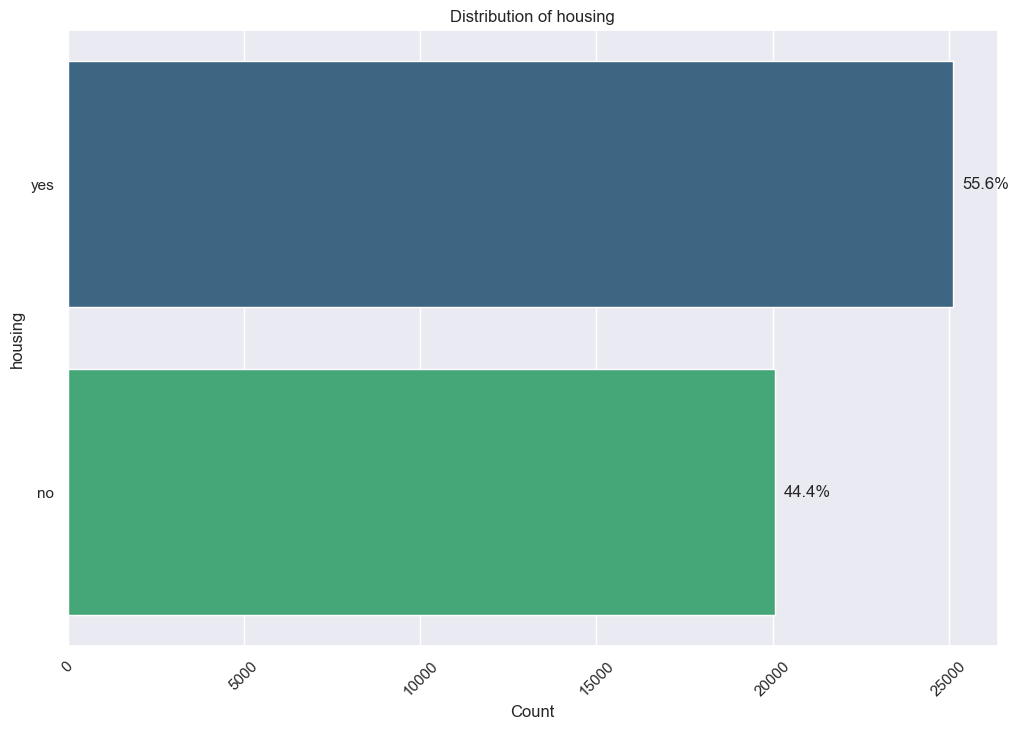

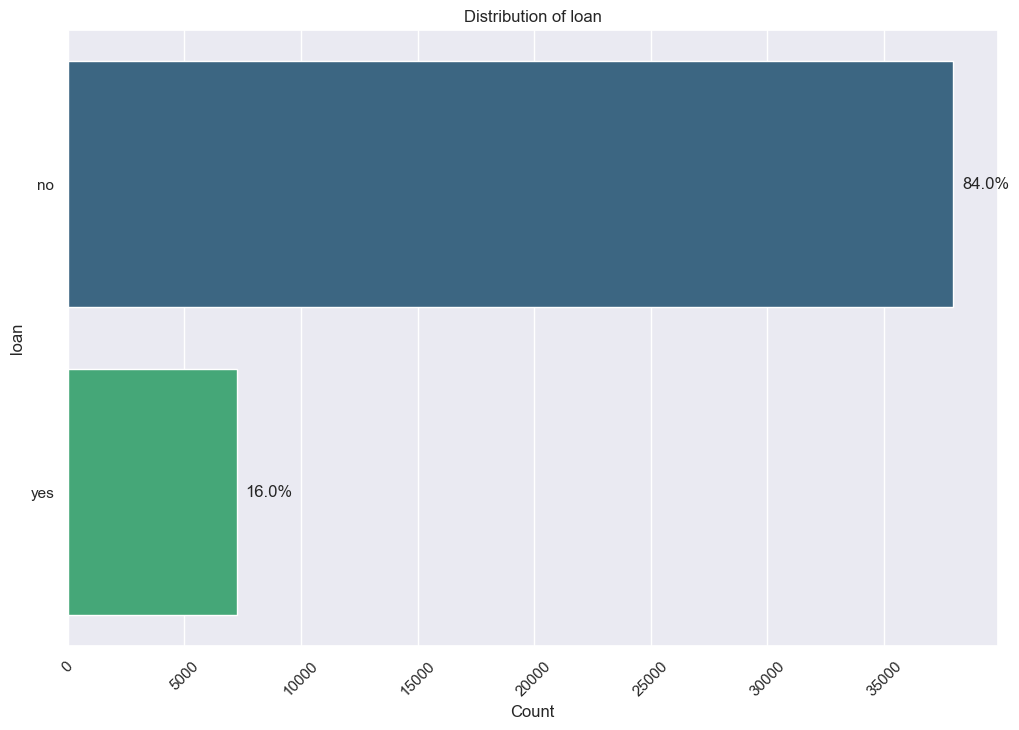

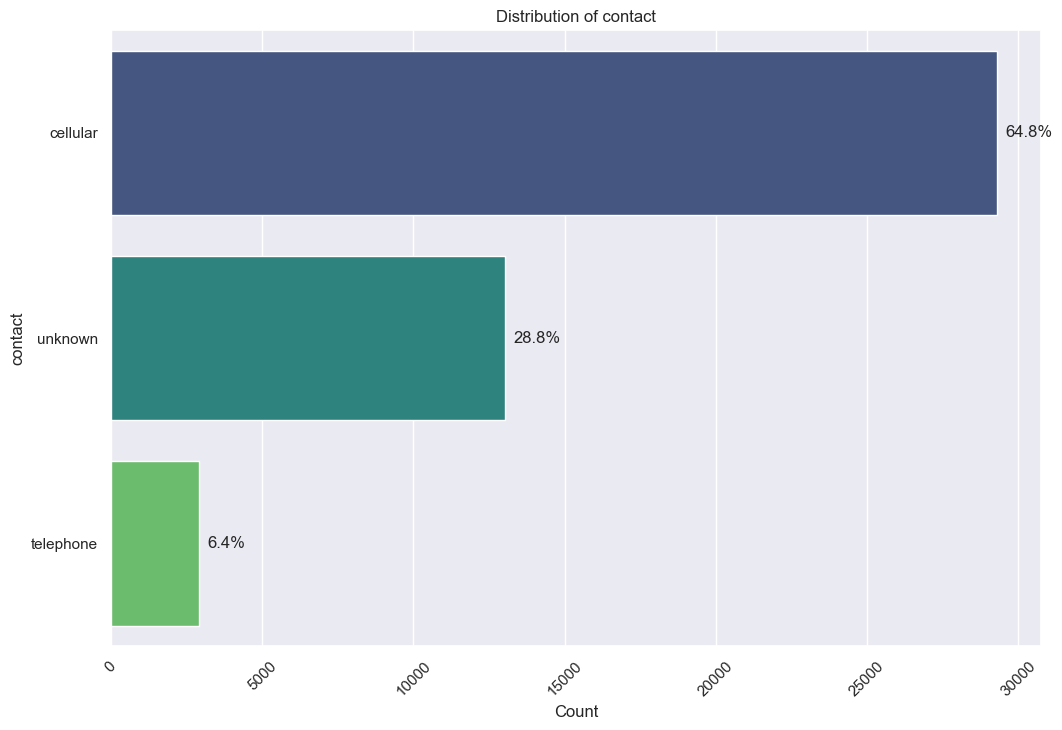

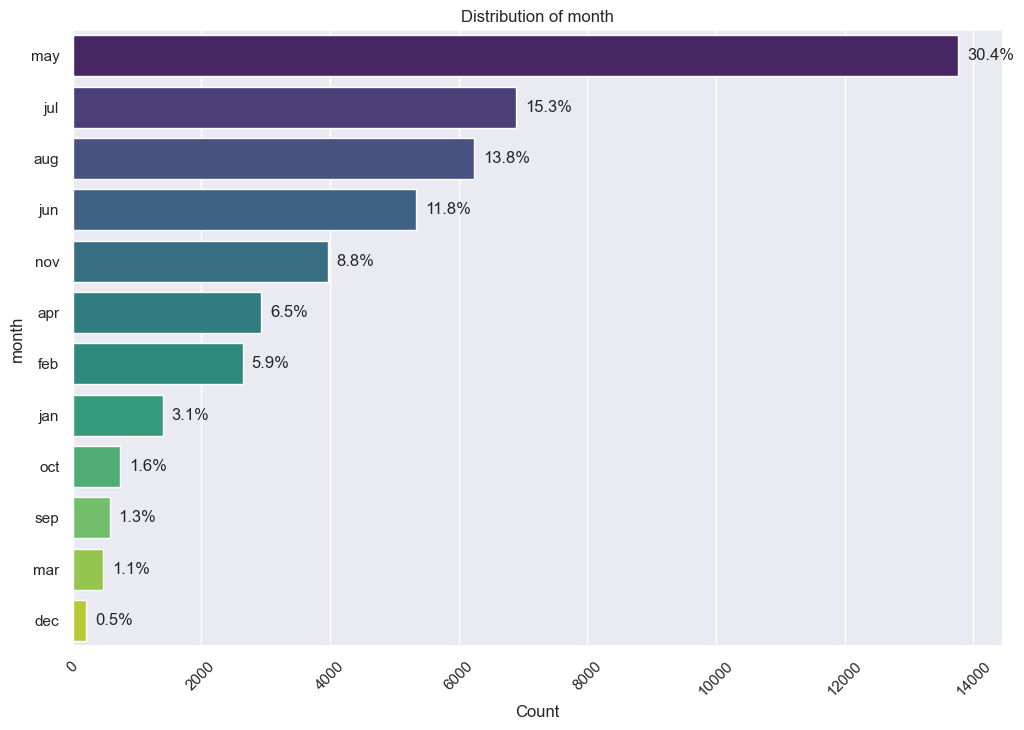

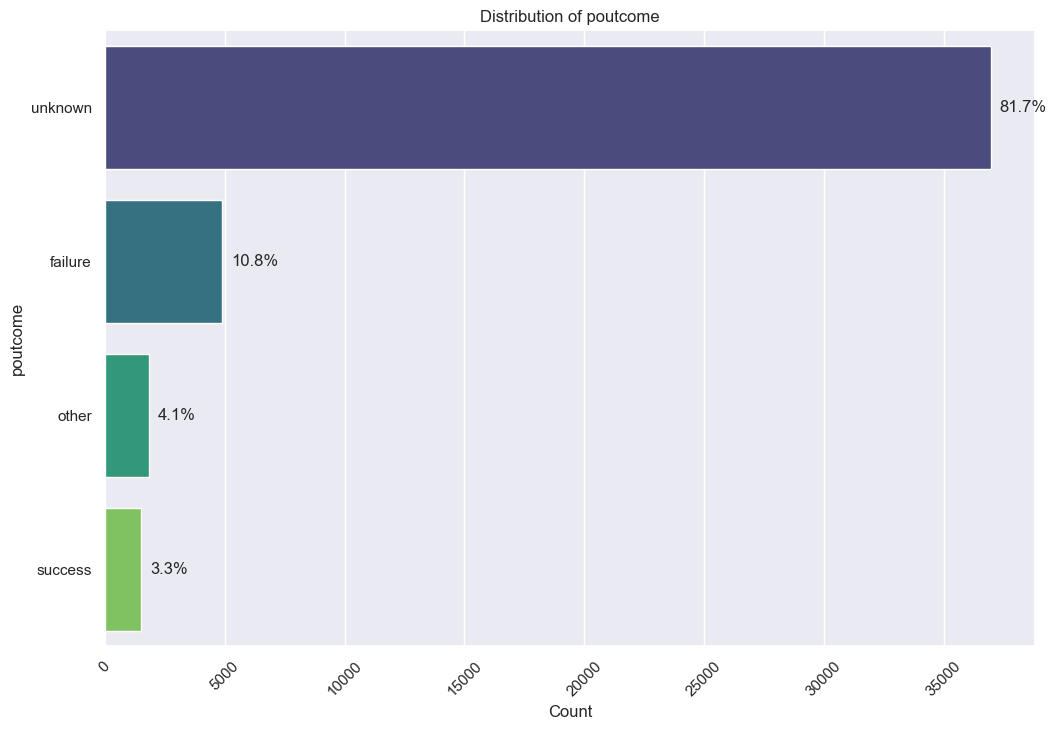

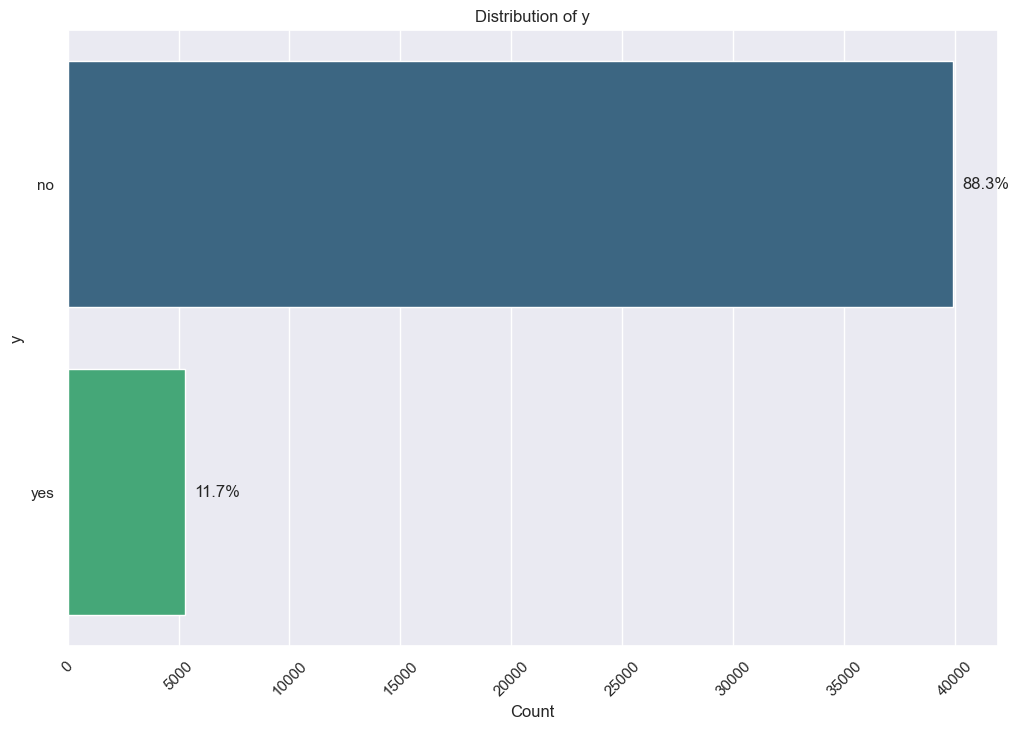

In [10]:
def plot_all_category_distributions(df):

    category_cols = df.select_dtypes(include=['object', 'category'])
    
    for column in category_cols.columns:
        plt.figure(figsize=(12, 8))
    
        counts = df[column].value_counts()
        total = counts.sum()
        
        plot_data = counts.reset_index()
        plot_data.columns = [column, 'Count']
        plot_data['Percentage'] = (plot_data['Count'] / total) * 100
        
        sns.barplot(data=plot_data, y=column, x='Count', palette='viridis')
        
        for i in range(len(plot_data)):
            plt.text(
                x=plot_data['Count'].iloc[i] + plot_data['Count'].max() * 0.01, 
                y=i, 
                s=f"{plot_data['Percentage'].iloc[i]:.1f}%", 
                va='center'
            )
        
        plt.title(f'Distribution of {column}')
        plt.xlabel('Count')
        plt.ylabel(column)
        plt.xticks(rotation=45)
        plt.show()

plot_all_category_distributions(df)

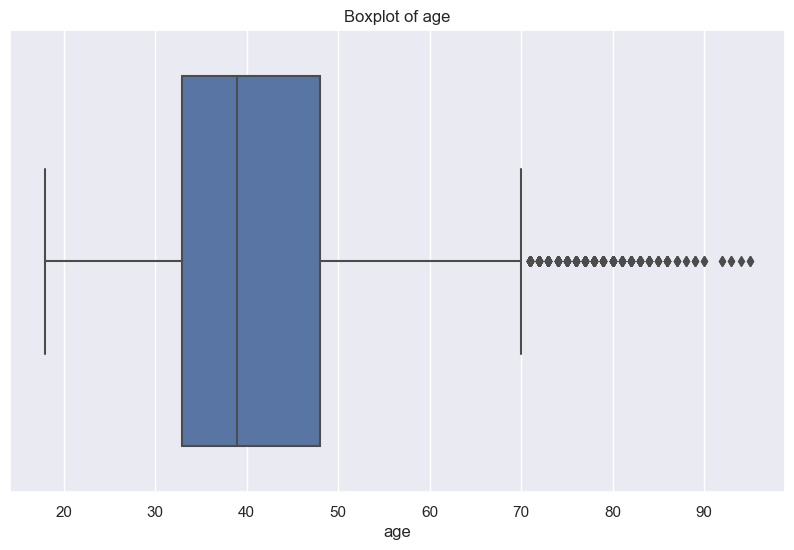

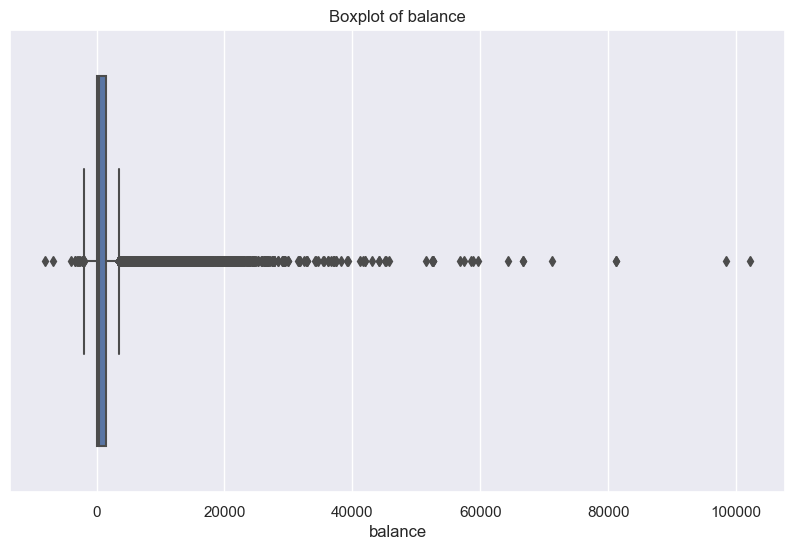

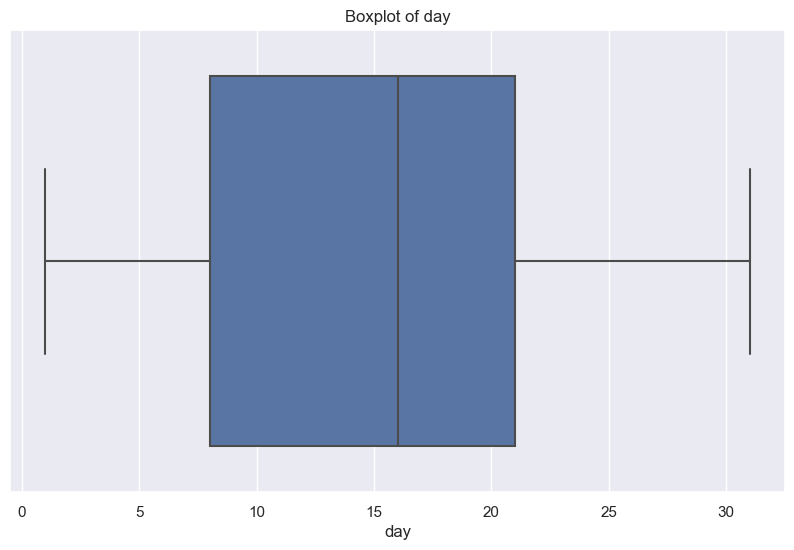

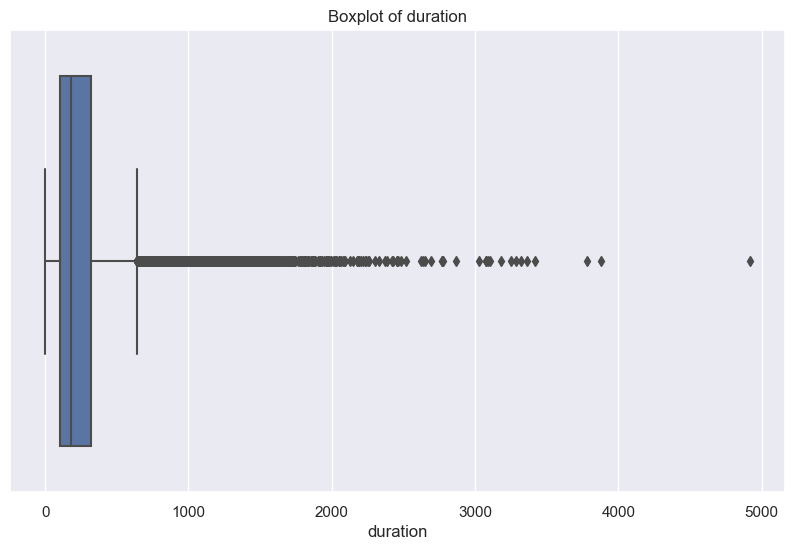

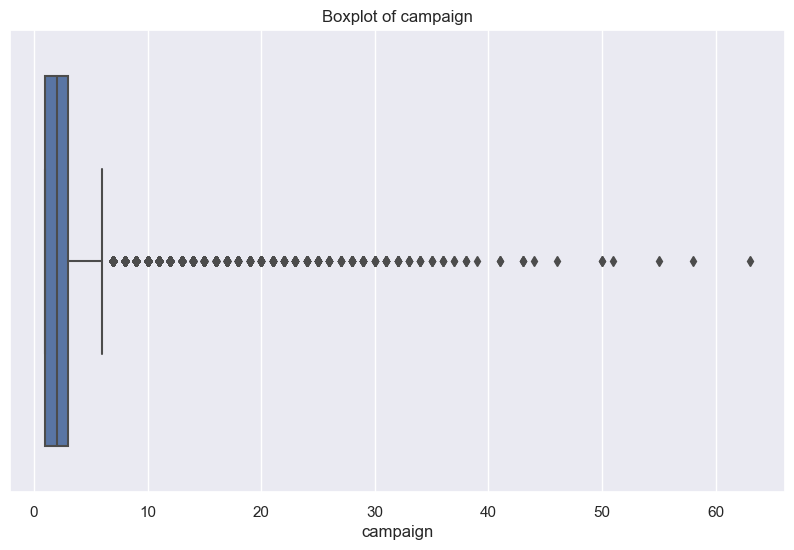

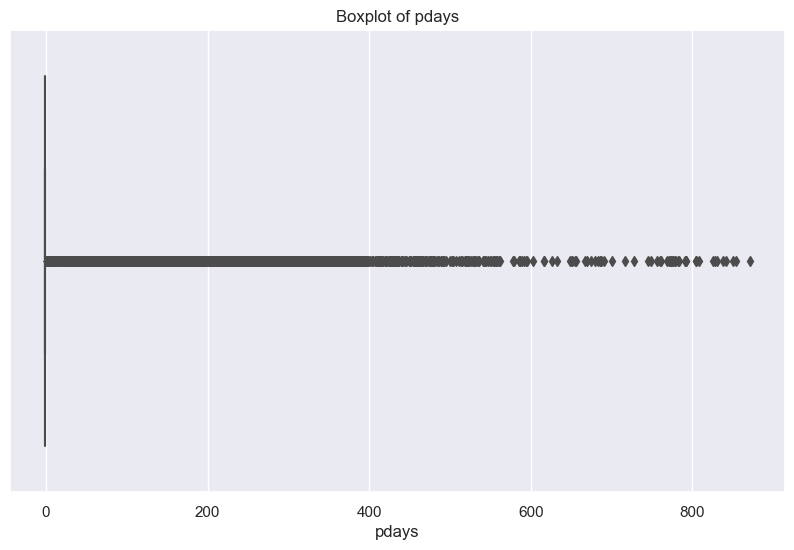

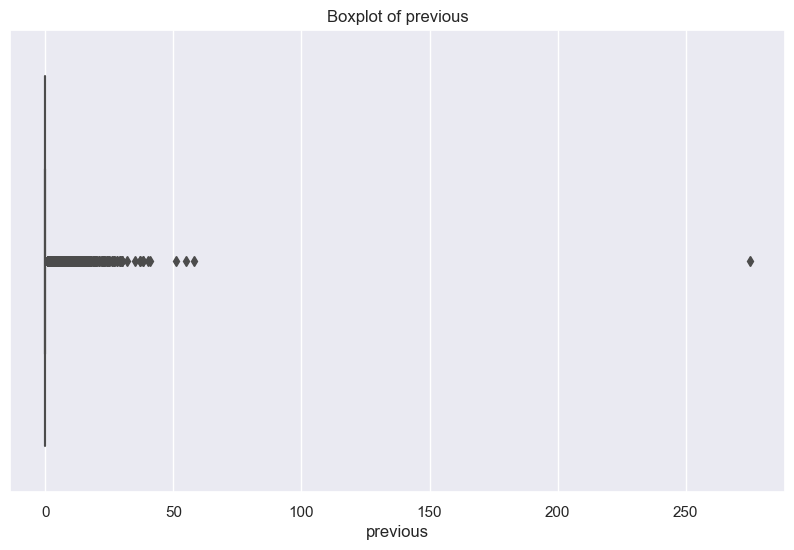

In [11]:
def plot_boxplots(df, numeric_cols=None):

    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include=['number']).columns
    
    for column in numeric_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)
        plt.show()

plot_boxplots(df)

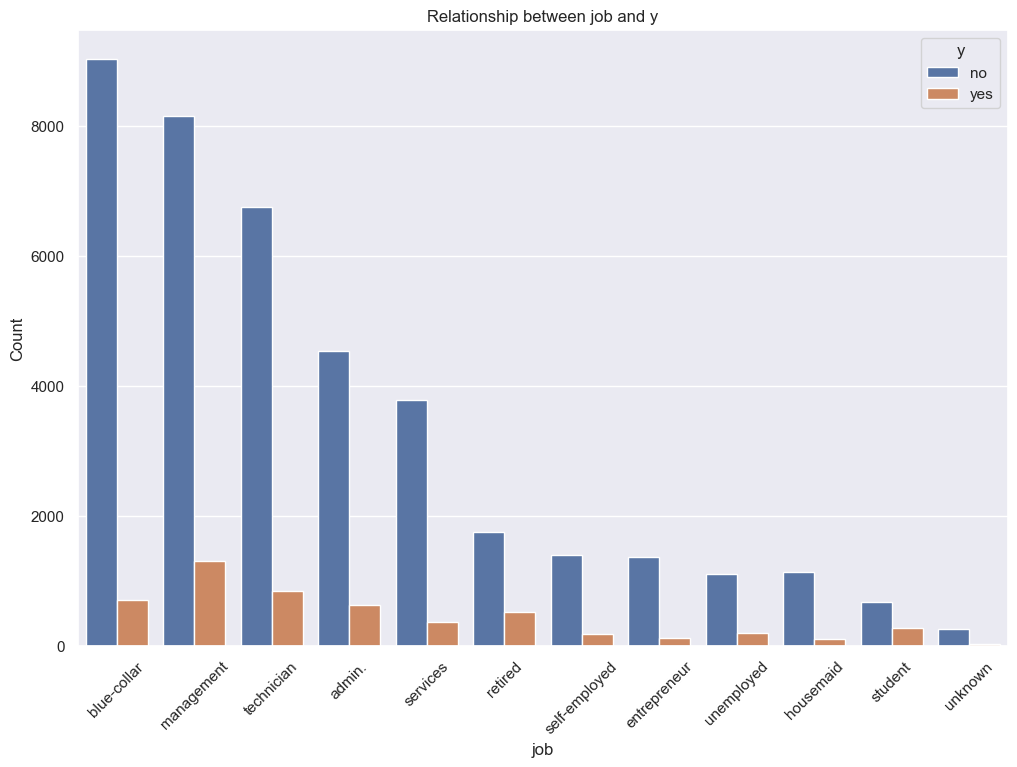

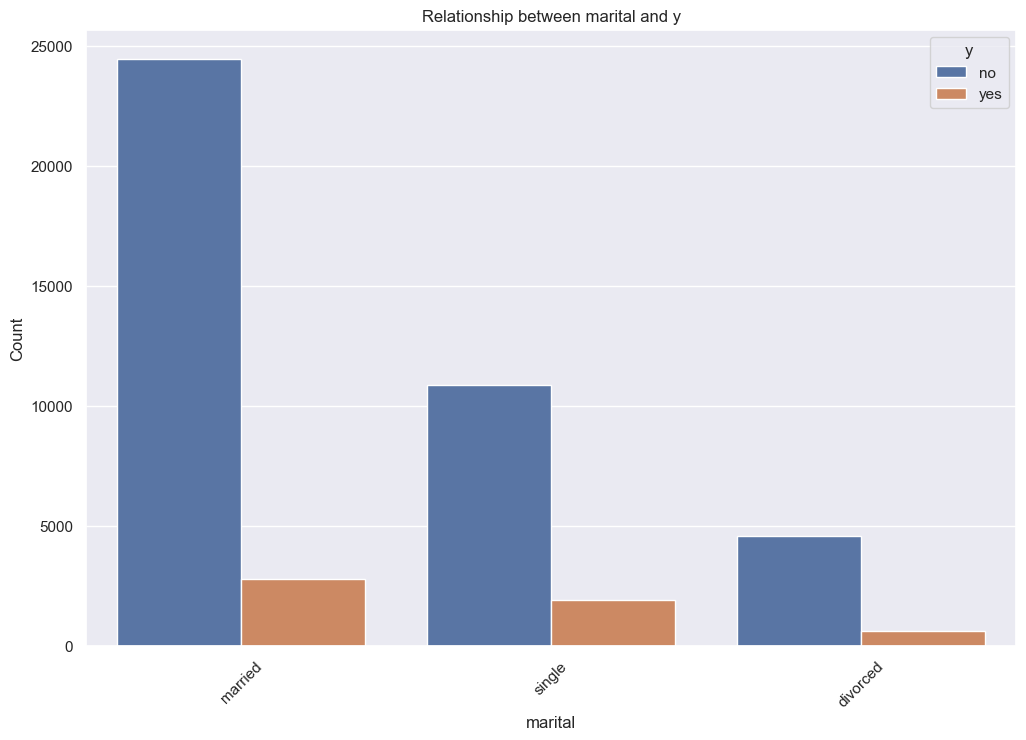

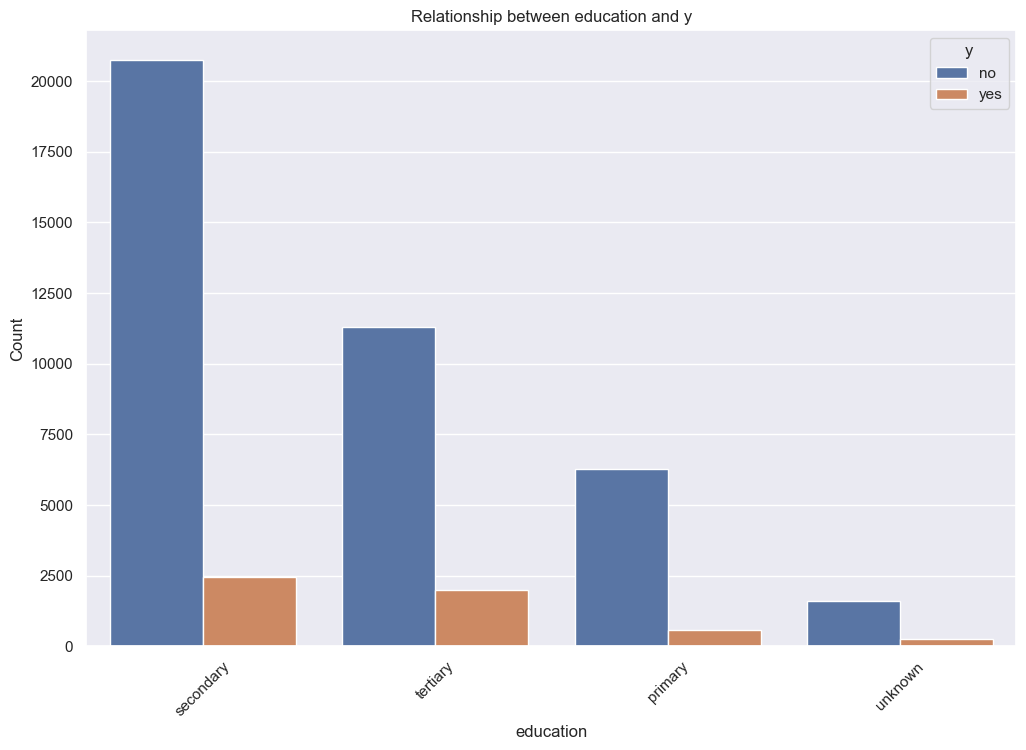

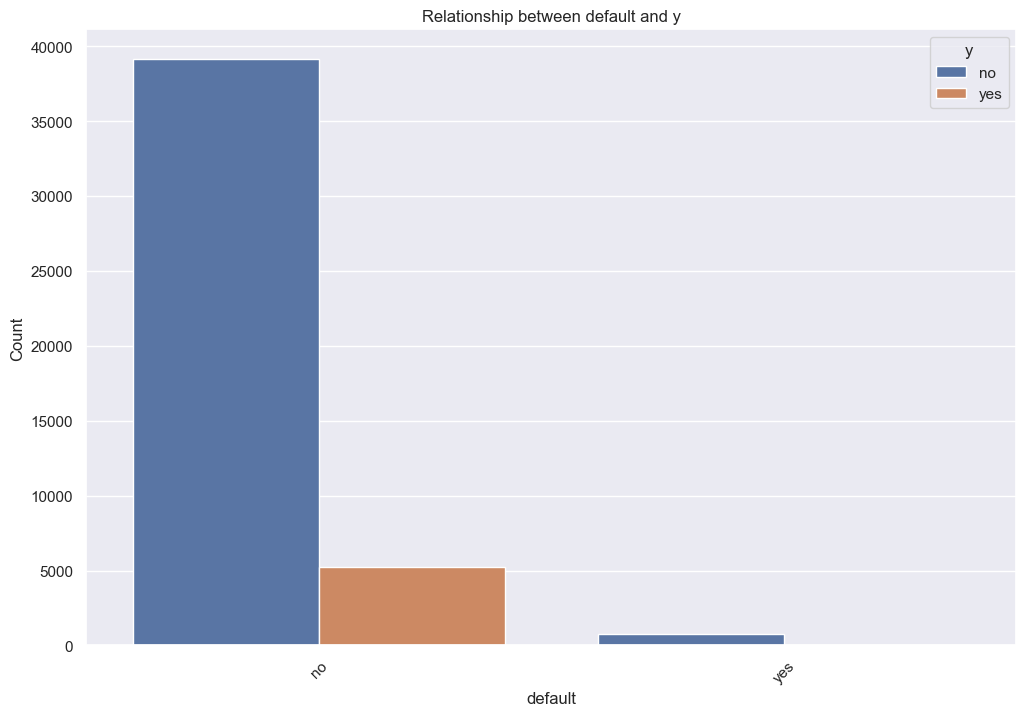

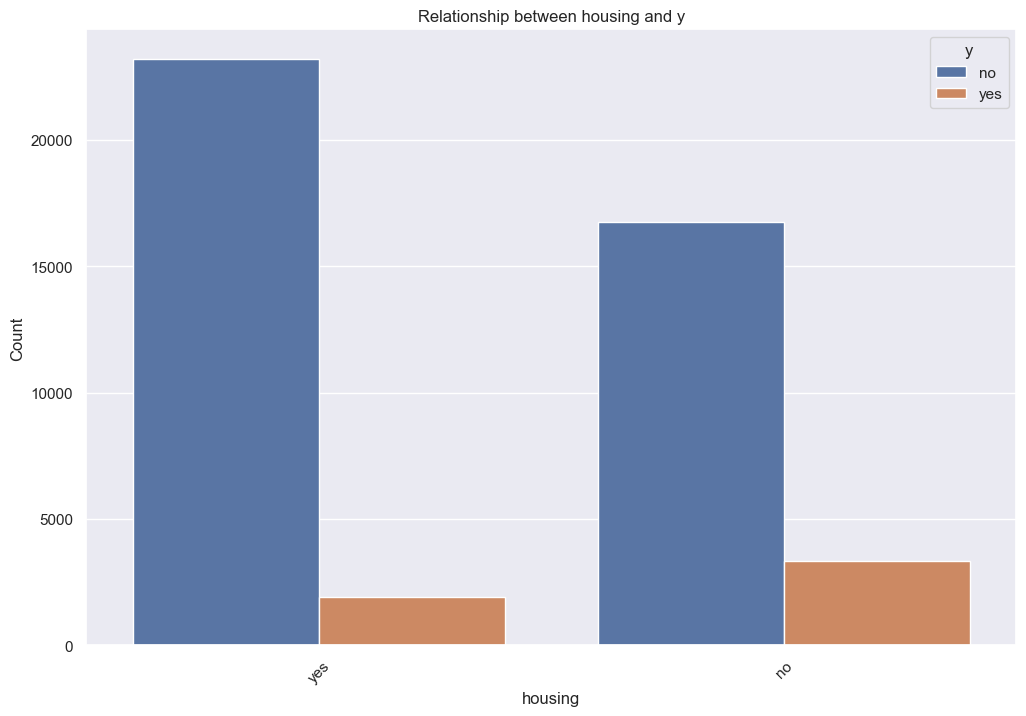

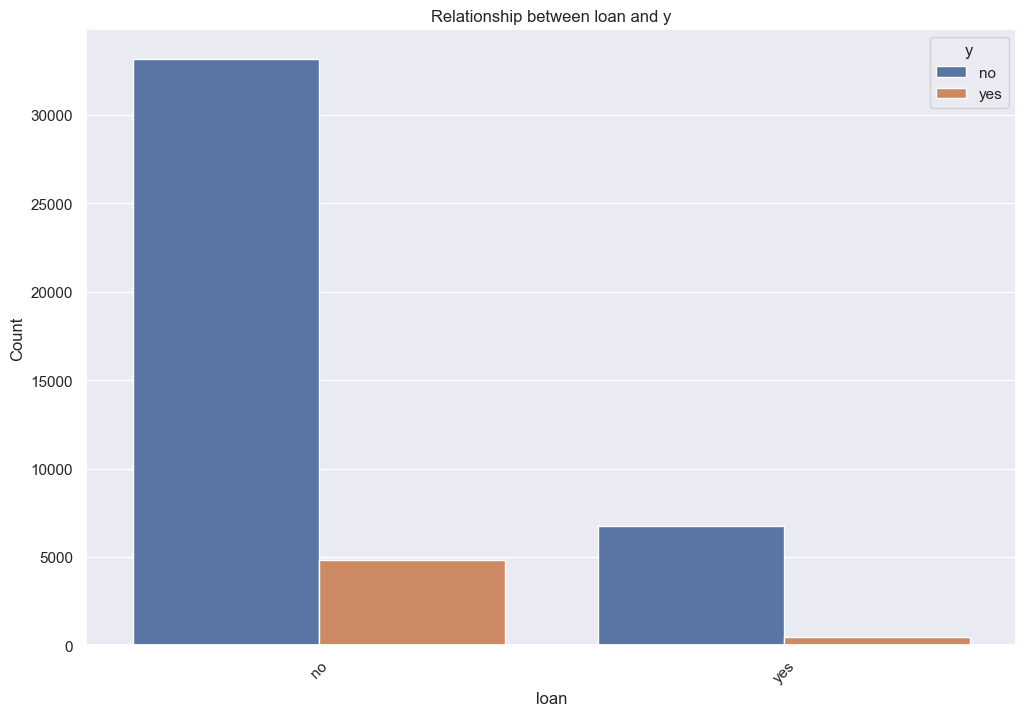

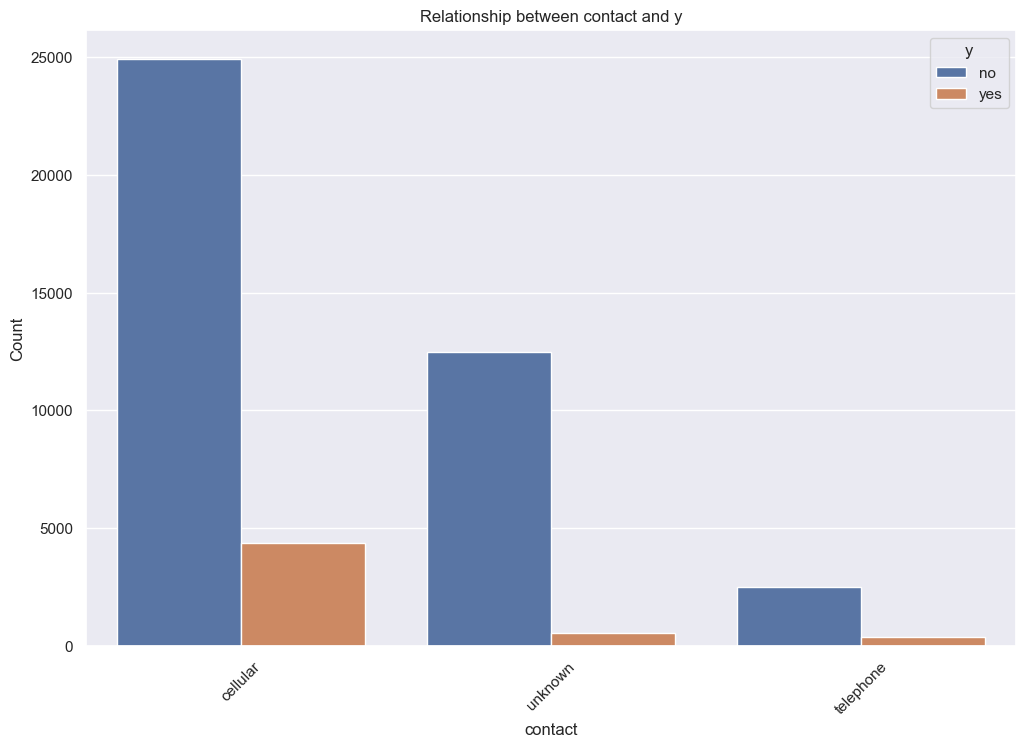

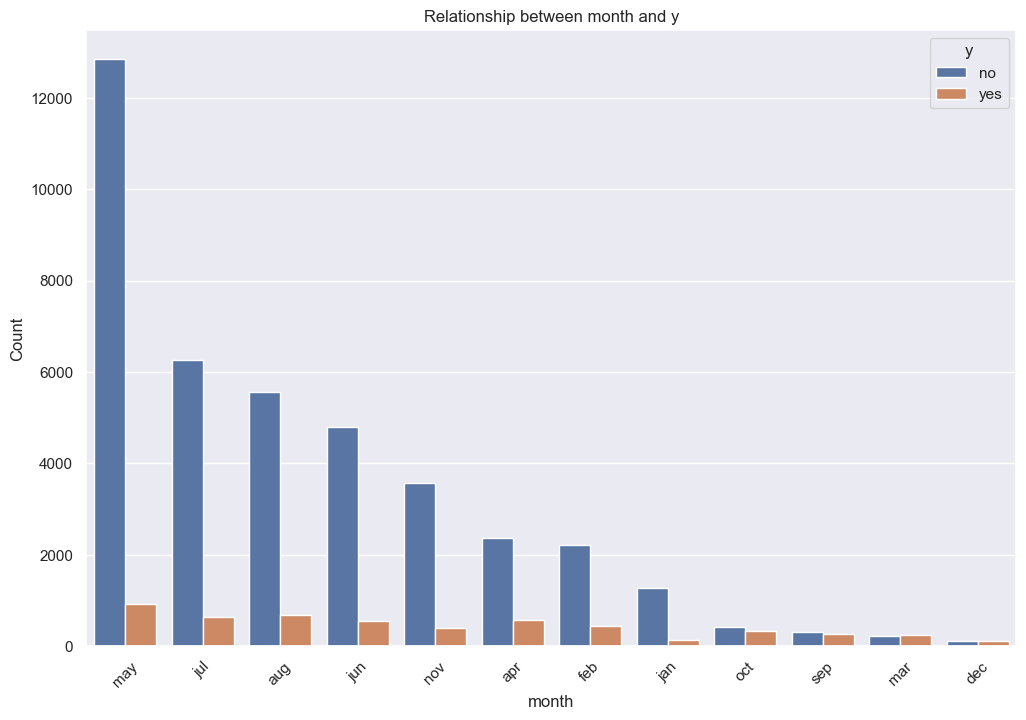

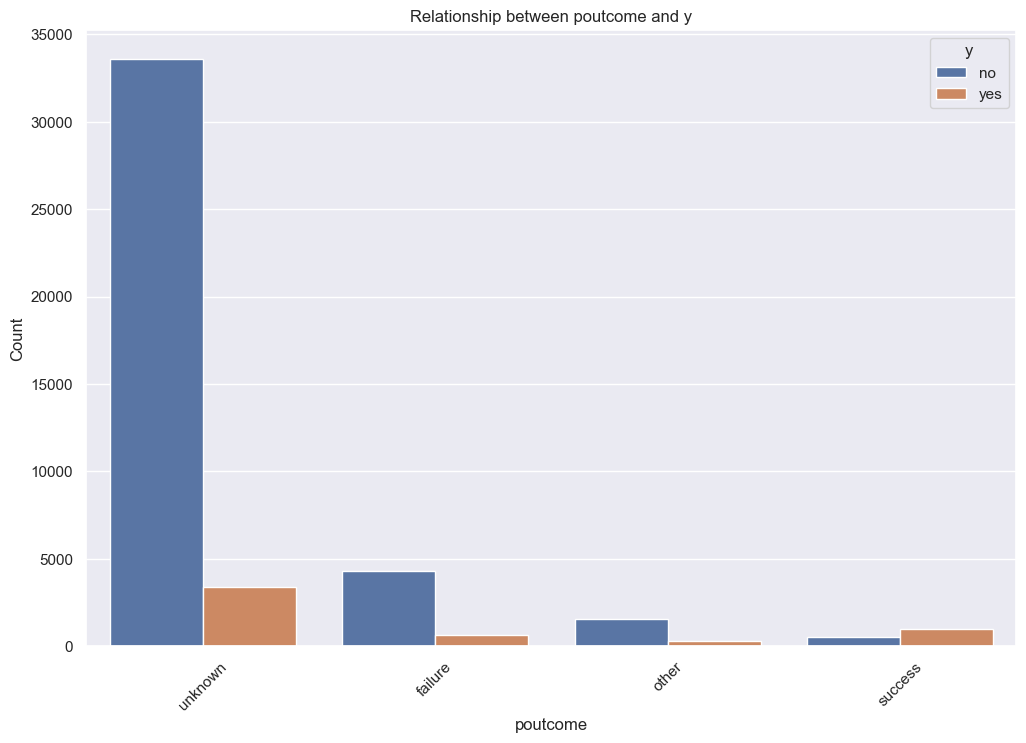

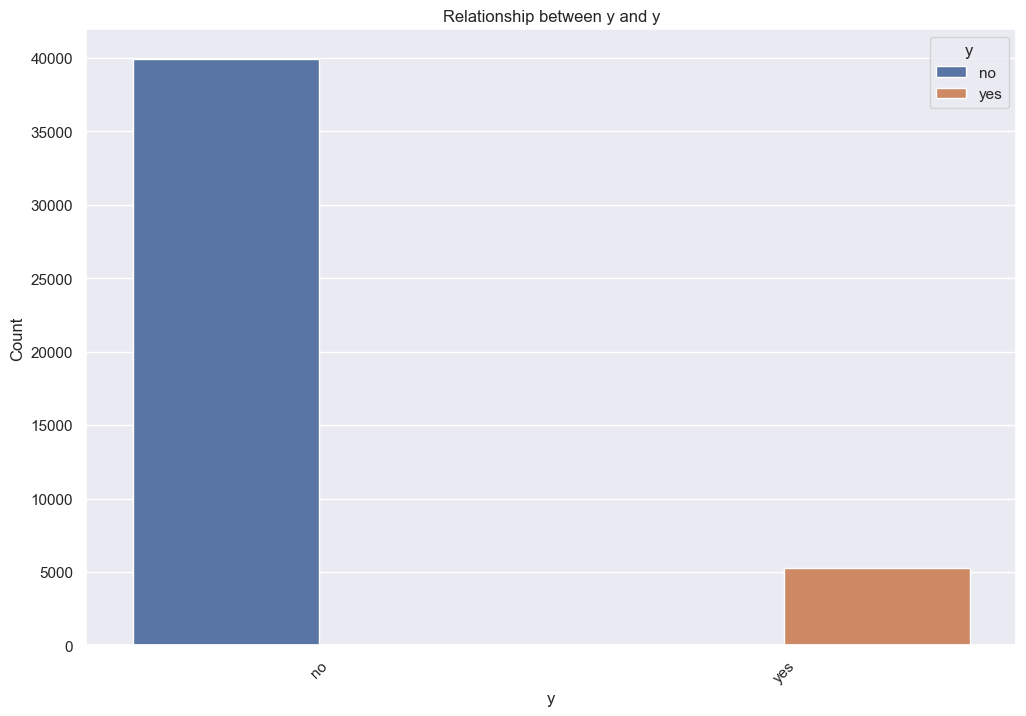

In [12]:
def plot_categorical_vs_target(df, cat_feature, target):

    plt.figure(figsize=(12, 8))
    sns.countplot(data=df, x=cat_feature, hue=target, order=df[cat_feature].value_counts().index)
    plt.title(f'Relationship between {cat_feature} and {target}')
    plt.xticks(rotation=45)
    plt.xlabel(cat_feature)
    plt.ylabel('Count')
    plt.show()

for col in category_cols.columns:
    plot_categorical_vs_target(df, col , 'y')



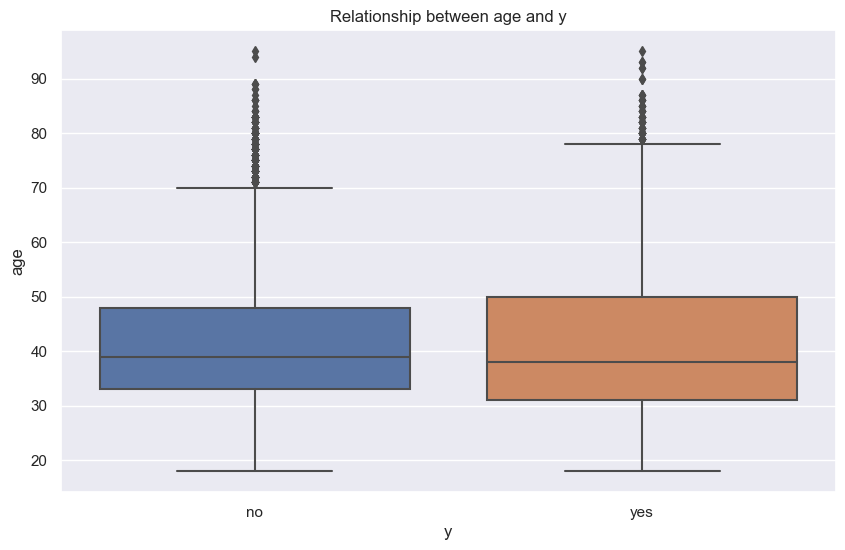

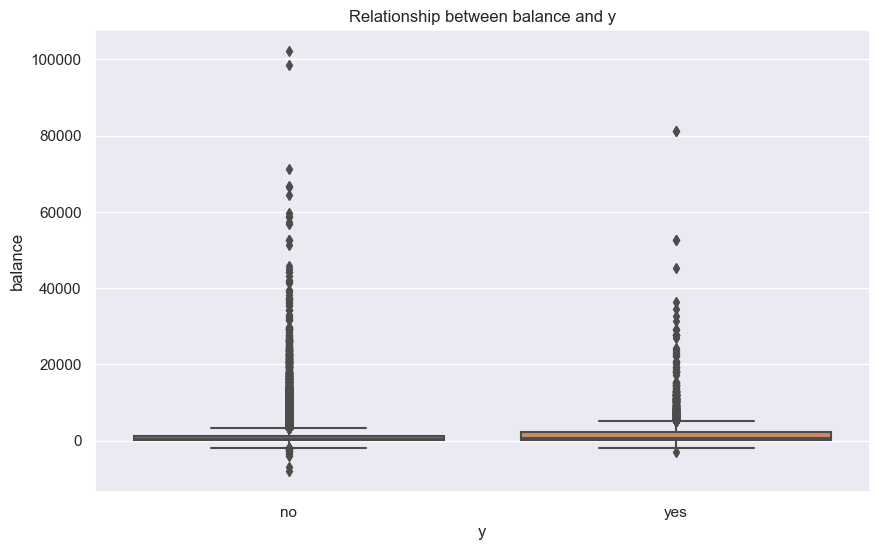

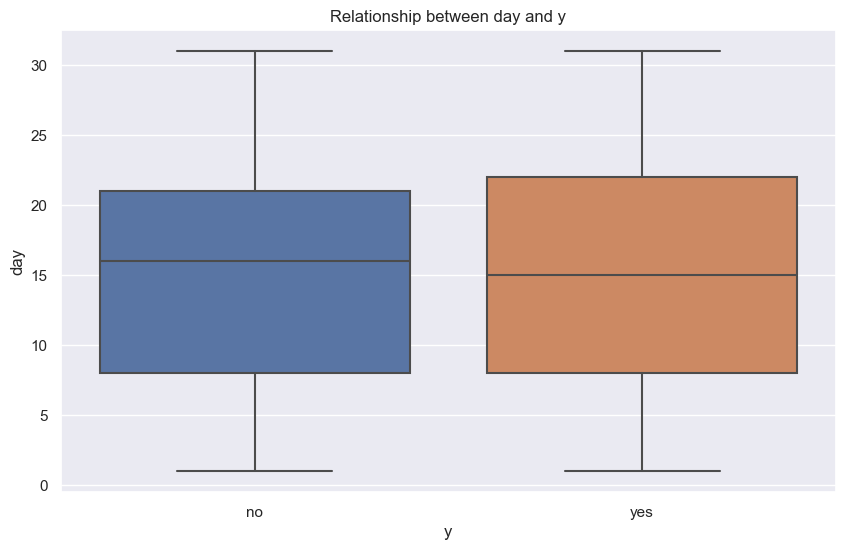

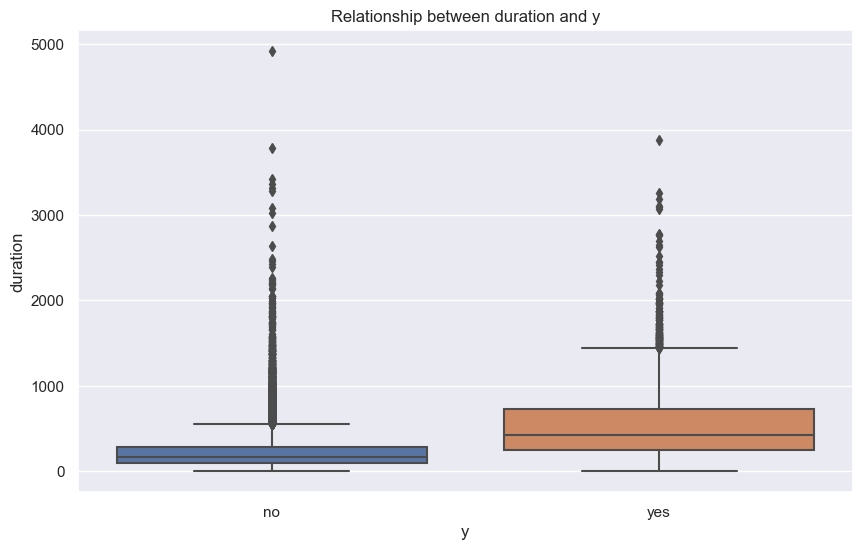

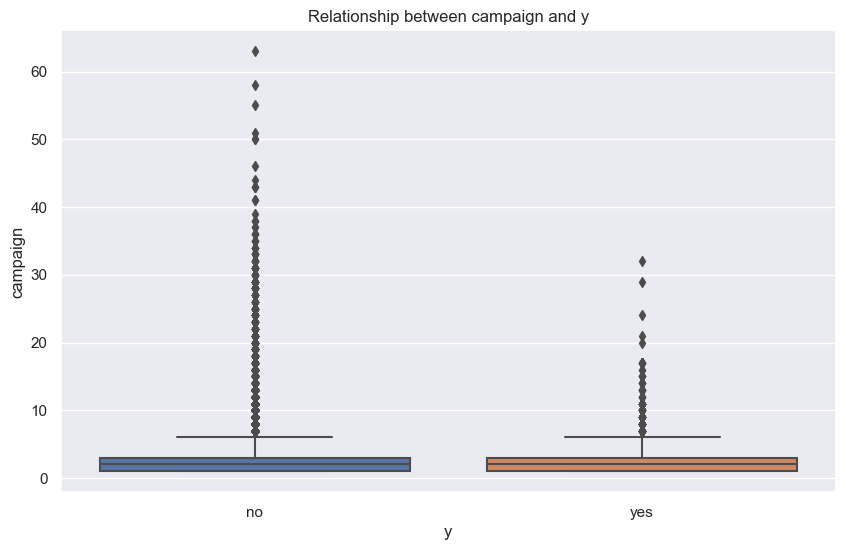

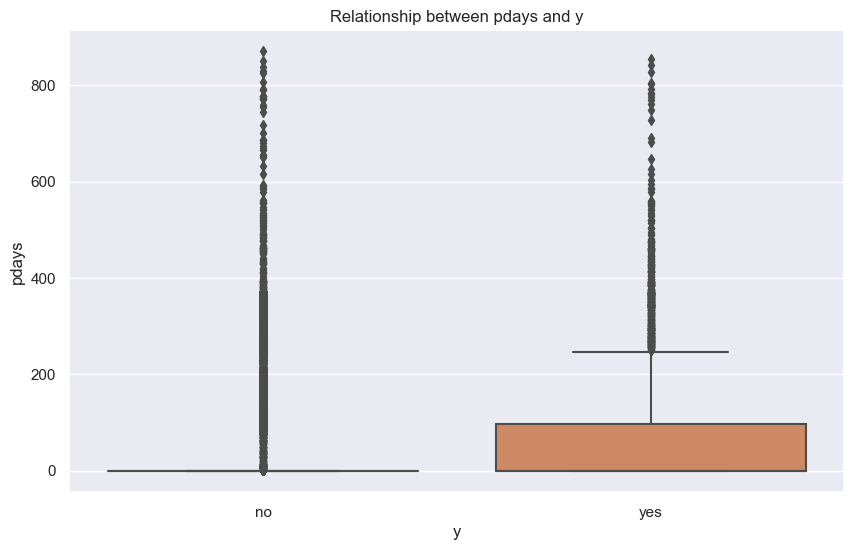

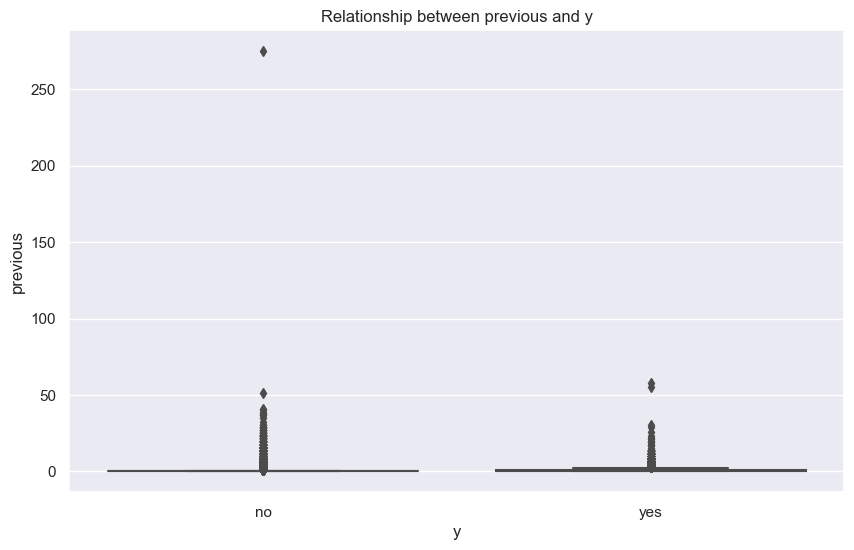

In [13]:
def plot_numerical_vs_target(df, num_feature, target):

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=target, y=num_feature)
    plt.title(f'Relationship between {num_feature} and {target}')
    plt.xlabel(target)
    plt.ylabel(num_feature)
    plt.show()

for col in num_cols.columns:
    plot_numerical_vs_target(df, col , 'y')


In [14]:
def replace_unknown_with_nan(df, columns=None):

    if columns is None:
        columns = df.columns
    
    for column in columns:
        if df[column].dtype == 'object': 
            df[column].replace('unknown', np.nan, inplace=True)
    
    return df

df = replace_unknown_with_nan(df)

In [15]:
(df.isna().sum()/df.shape[0])*100

age           0.000000
job           0.637013
marital       0.000000
education     4.107407
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
contact      28.798301
day           0.000000
month         0.000000
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
poutcome     81.747805
y             0.000000
dtype: float64

In [16]:
df.drop(columns=['contact', 'poutcome'], inplace=True)
df.dropna(subset=['job', 'education'], inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,5,may,139,1,-1,0,no
6,28,management,single,tertiary,no,447,yes,yes,5,may,217,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,-1,0,no


In [17]:
(df.isnull().sum()/df.shape[0])*100

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
y            0.0
dtype: float64

In [18]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [19]:
def label_encode(df, columns):
   
    le = LabelEncoder()
    for column in columns:
        df[column] = le.fit_transform(df[column])
    return df

df = label_encode(df, ['default', 'housing', 'loan', 'y'])
df

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,5,may,261,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,5,may,151,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,5,may,76,1,-1,0,0
5,35,management,married,tertiary,0,231,1,0,5,may,139,1,-1,0,0
6,28,management,single,tertiary,0,447,1,1,5,may,217,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,17,nov,977,3,-1,0,1
45207,71,retired,divorced,primary,0,1729,0,0,17,nov,456,2,-1,0,1
45208,72,retired,married,secondary,0,5715,0,0,17,nov,1127,5,184,3,1
45209,57,blue-collar,married,secondary,0,668,0,0,17,nov,508,4,-1,0,0


In [20]:
def one_hot_encode(df, columns):
    encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')
    
    for column in columns:
        encoded = encoder.fit_transform(df[[column]])
        encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out([column]), index=df.index)
        df = df.drop(column, axis=1)
        df = pd.concat([df, encoded_df], axis=1)  
    return df

df = one_hot_encode(df, ['job', 'marital', 'education', 'month'])


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43193 entries, 0 to 45210
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  43193 non-null  int64  
 1   default              43193 non-null  int32  
 2   balance              43193 non-null  int64  
 3   housing              43193 non-null  int32  
 4   loan                 43193 non-null  int32  
 5   day                  43193 non-null  int64  
 6   duration             43193 non-null  int64  
 7   campaign             43193 non-null  int64  
 8   pdays                43193 non-null  int64  
 9   previous             43193 non-null  int64  
 10  y                    43193 non-null  int32  
 11  job_blue-collar      43193 non-null  float64
 12  job_entrepreneur     43193 non-null  float64
 13  job_housemaid        43193 non-null  float64
 14  job_management       43193 non-null  float64
 15  job_retired          43193 non-null 

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop('y', axis=1)  
y = df['y']               
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,             
    random_state=42,           
    stratify=y)                 

In [24]:
df['y'].value_counts()

0    38172
1     5021
Name: y, dtype: int64

In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)


In [27]:
# Import libraries for model evaluation
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    GradientBoostingClassifier,
)
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsOneClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
import xgboost as xgb
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
)

For OneVsOneClassifier Model : 
__________________________________________________________________________________________
Train Score is 0.7132822477650064
Test Score is 0.3415904618590115
              precision    recall  f1-score   support

           0       1.00      0.26      0.41      7635
           1       0.15      1.00      0.26      1004

    accuracy                           0.34      8639
   macro avg       0.57      0.63      0.33      8639
weighted avg       0.90      0.34      0.39      8639



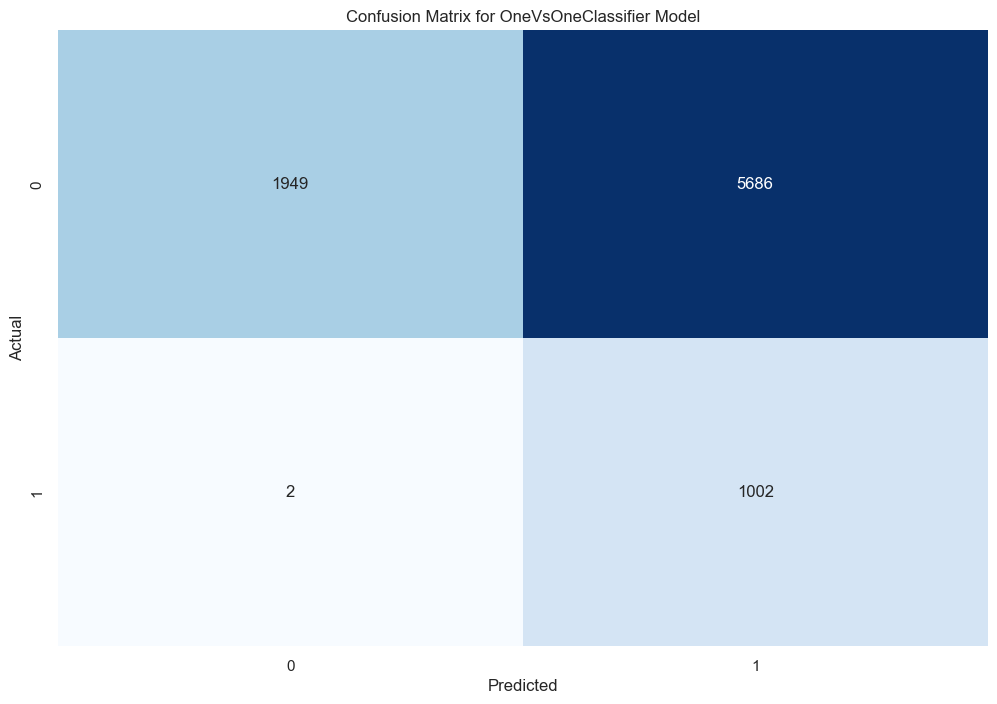

For SGDClassifier Model : 
__________________________________________________________________________________________
Train Score is 0.8561581032845401
Test Score is 0.8140988540340317
              precision    recall  f1-score   support

           0       0.97      0.82      0.89      7635
           1       0.36      0.80      0.50      1004

    accuracy                           0.81      8639
   macro avg       0.67      0.81      0.69      8639
weighted avg       0.90      0.81      0.84      8639



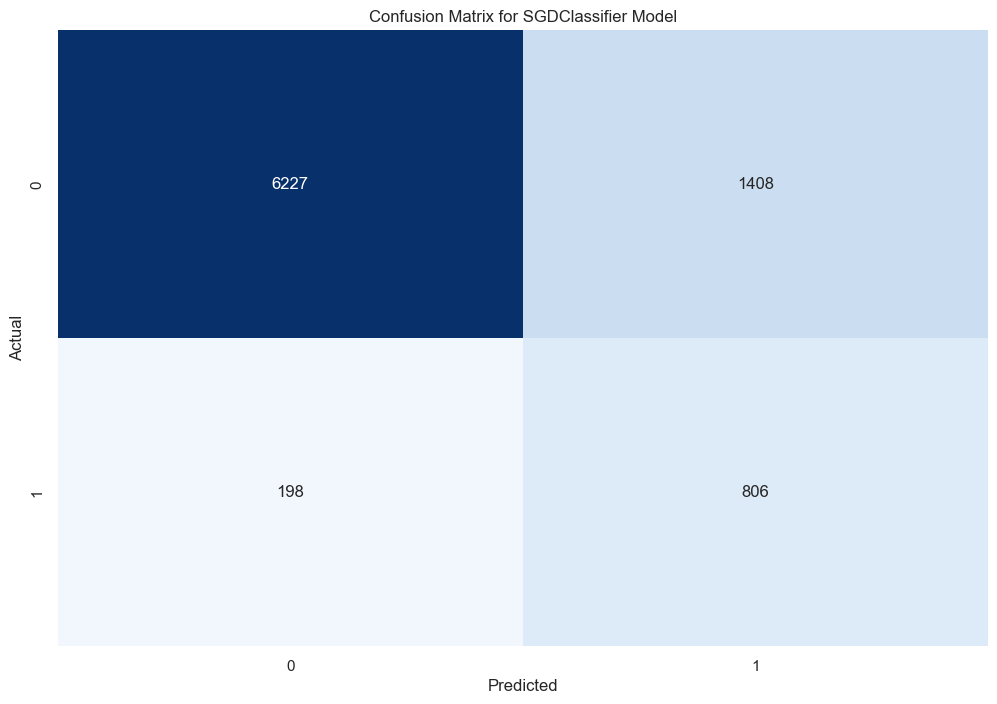

For LogisticRegression Model : 
__________________________________________________________________________________________
Train Score is 0.8588924910763991
Test Score is 0.8388702396110661
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      7635
           1       0.40      0.78      0.53      1004

    accuracy                           0.84      8639
   macro avg       0.68      0.81      0.72      8639
weighted avg       0.90      0.84      0.86      8639



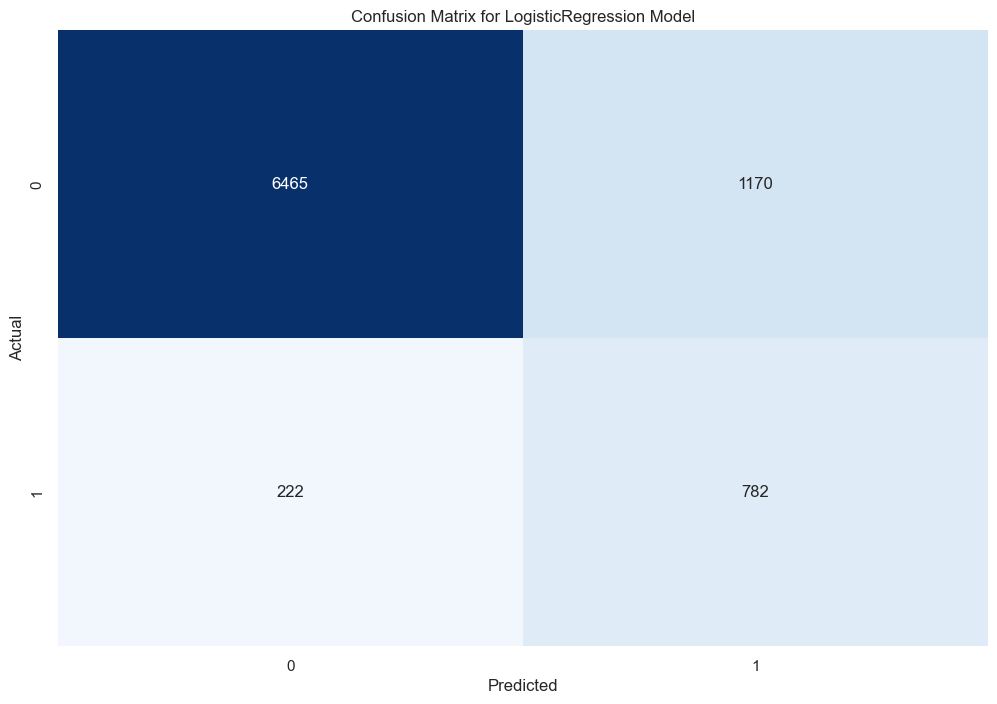

For XGBoost Model : 
__________________________________________________________________________________________
Train Score is 0.9695287683793431
Test Score is 0.9072809352934368
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7635
           1       0.62      0.53      0.57      1004

    accuracy                           0.91      8639
   macro avg       0.78      0.74      0.76      8639
weighted avg       0.90      0.91      0.90      8639



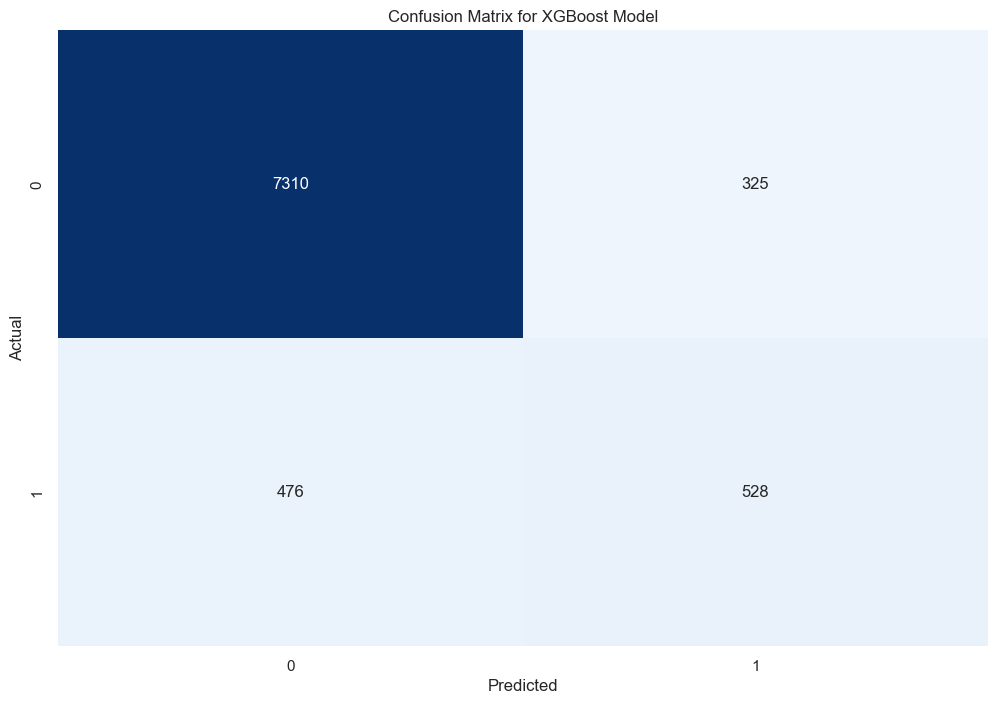

For DecisionTree Model : 
__________________________________________________________________________________________
Train Score is 1.0
Test Score is 0.8704711193425165
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7635
           1       0.45      0.50      0.47      1004

    accuracy                           0.87      8639
   macro avg       0.69      0.71      0.70      8639
weighted avg       0.88      0.87      0.87      8639



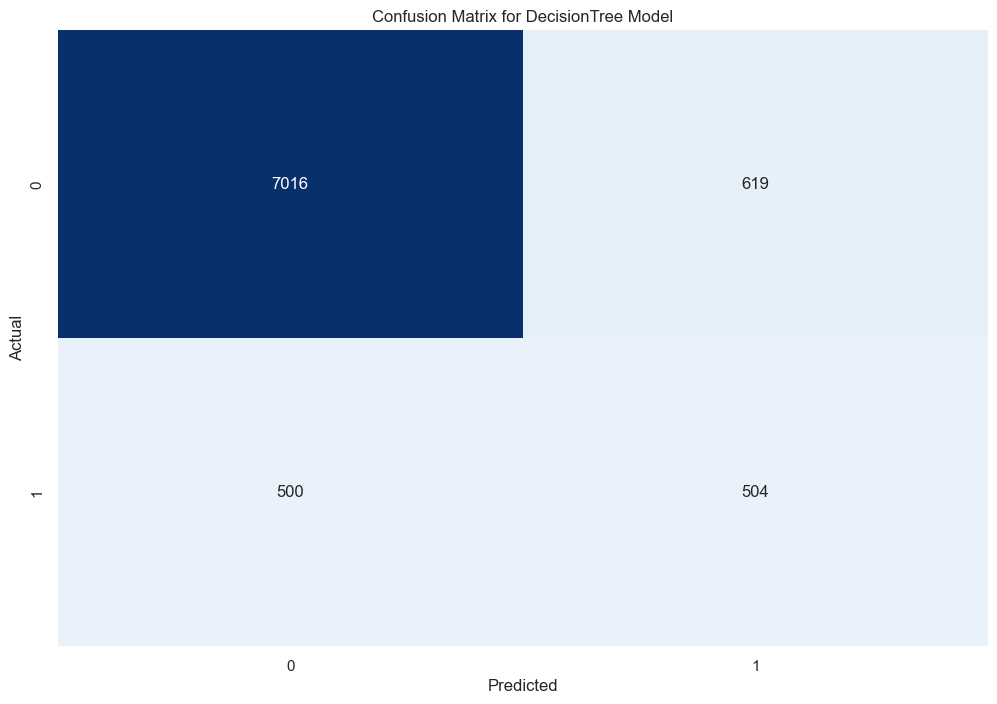

For RandomForest Model : 
__________________________________________________________________________________________
Train Score is 1.0
Test Score is 0.8994096538951267
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7635
           1       0.60      0.41      0.48      1004

    accuracy                           0.90      8639
   macro avg       0.76      0.68      0.71      8639
weighted avg       0.89      0.90      0.89      8639



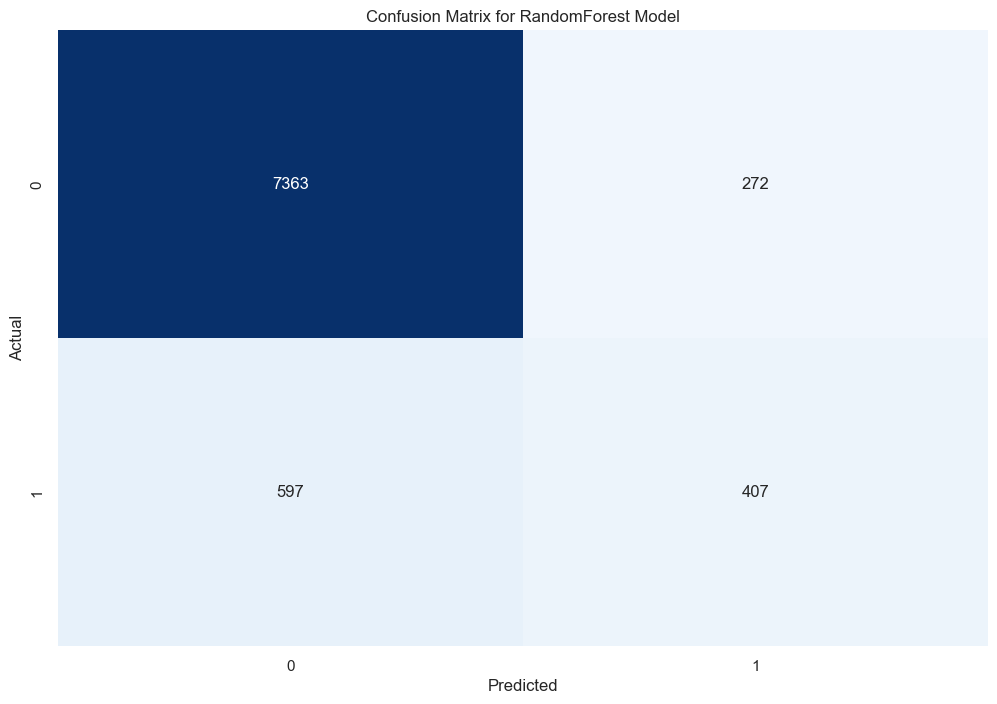

For BaggingClassifier Model : 
__________________________________________________________________________________________
Train Score is 0.9957756164652717
Test Score is 0.8926959138789212
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7635
           1       0.55      0.46      0.50      1004

    accuracy                           0.89      8639
   macro avg       0.74      0.70      0.72      8639
weighted avg       0.89      0.89      0.89      8639



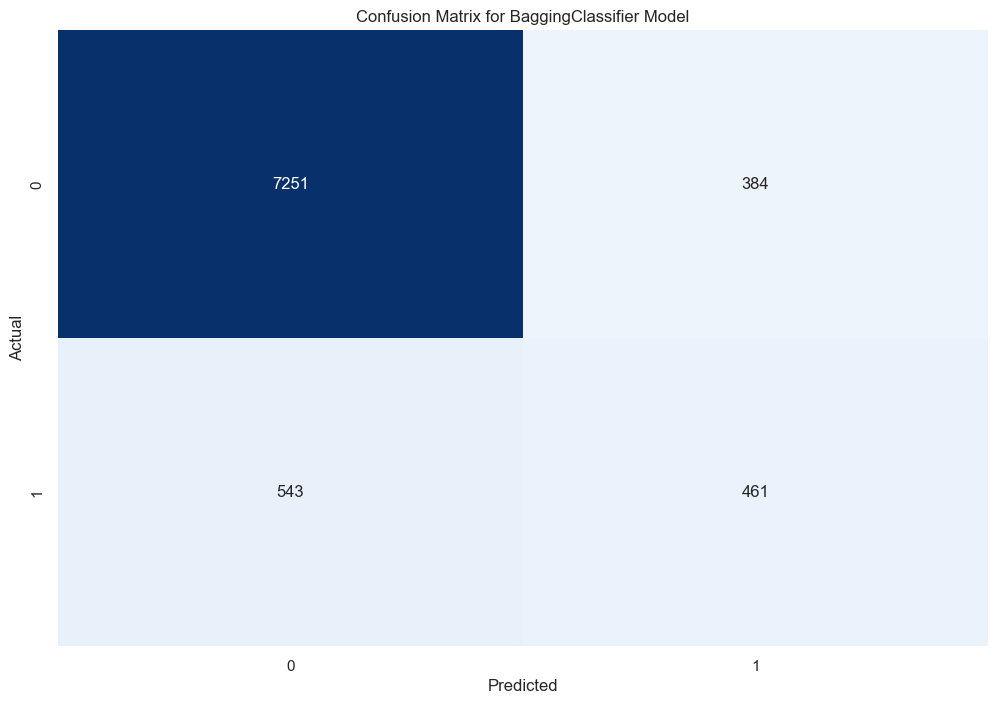

For BalancedRandomForest Model : 
__________________________________________________________________________________________
Train Score is 1.0
Test Score is 0.9004514411390208
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7635
           1       0.61      0.41      0.49      1004

    accuracy                           0.90      8639
   macro avg       0.77      0.69      0.72      8639
weighted avg       0.89      0.90      0.89      8639



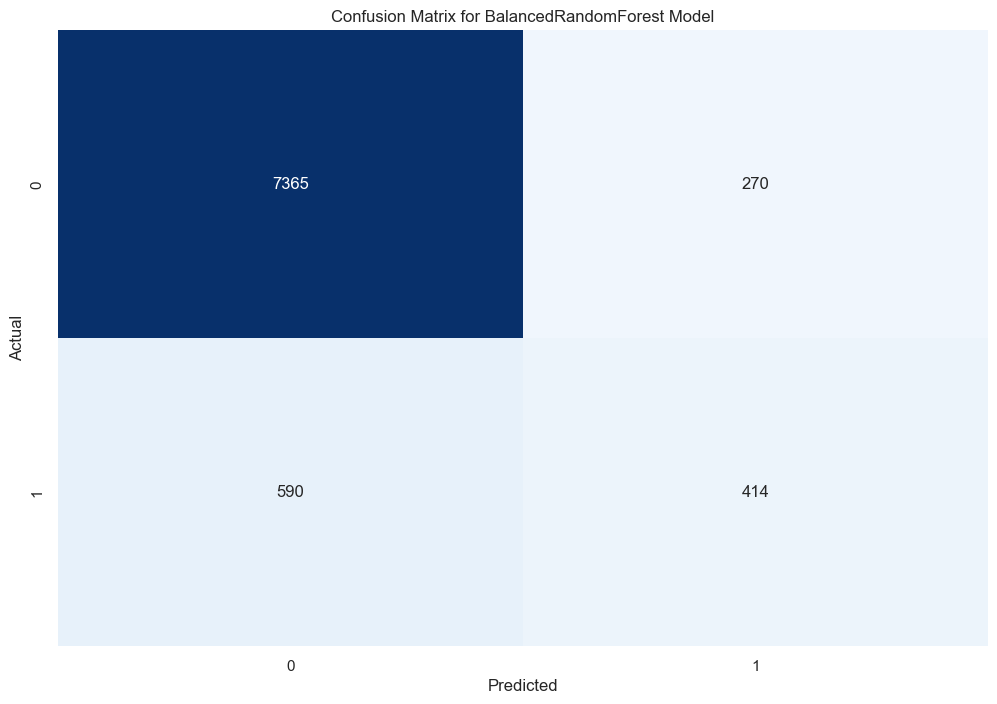

For GradientBoosting Model : 
__________________________________________________________________________________________
Train Score is 0.9389101745423585
Test Score is 0.9004514411390208
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7635
           1       0.58      0.54      0.56      1004

    accuracy                           0.90      8639
   macro avg       0.76      0.74      0.75      8639
weighted avg       0.90      0.90      0.90      8639



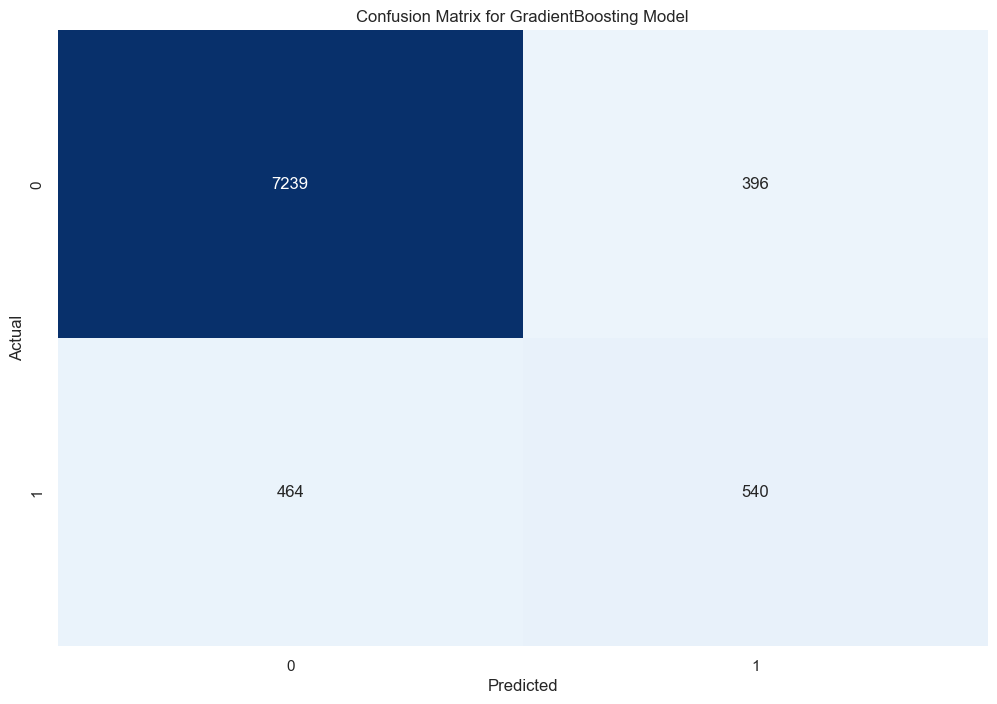

For SVC Model : 
__________________________________________________________________________________________
Train Score is 0.9401054458525723
Test Score is 0.8960527838870239
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      7635
           1       0.55      0.60      0.57      1004

    accuracy                           0.90      8639
   macro avg       0.75      0.77      0.76      8639
weighted avg       0.90      0.90      0.90      8639



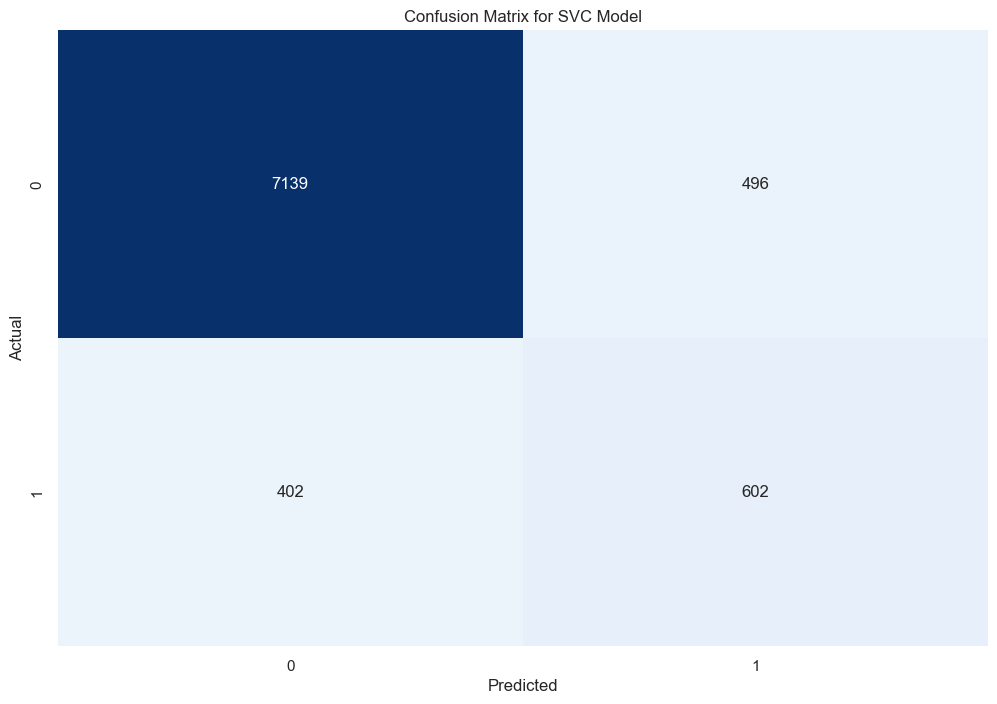

In [28]:
models = {
    'OneVsOneClassifier': OneVsOneClassifier(estimator=RandomForestClassifier()),
    'SGDClassifier': SGDClassifier(),
    'LogisticRegression': LogisticRegression(),
    'XGBoost': xgb.XGBClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'BalancedRandomForest': BalancedRandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'SVC': SVC()
}

# Model evaluation
for key, model in models.items():
    print(f'For {key} Model : ')
    print('_' * 90)
    
    # Fit and predict
    model.fit(X_resampled_scaled, y_resampled)
    
    # Make sure to scale the test data
    X_test_scaled = scaler.transform(X_test)
    y_pred = model.predict(X_test_scaled)
    
    # Accuracy and report
    train_accuracy = accuracy_score(y_resampled, model.predict(X_resampled_scaled))
    test_accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Train Score is {train_accuracy}")
    print(f"Test Score is {test_accuracy}")
    
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(confusion_mat, fmt='g', annot=True, cbar=False, vmin=0, cmap='Blues')
    plt.title(f'Confusion Matrix for {key} Model')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()